In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
from scipy import stats

%matplotlib inline

In [69]:
aci_df = pd.read_csv('../data/aci_curve_data.csv')

aci_df = aci_df[~aci_df['which_400'].isin(['first', 'second', 'fourth', 'fifth'])]

# note, one licor got stuck at 1000umol/m-2/s-1 of light during the ACi curve (as opposed to 1500) so I'm removing those data points here 
aci_df = aci_df[aci_df['light'] == 1500]

grouped_df = aci_df.groupby(['CO2_r_sp', 'plot', 'type']).agg({'A': ['mean', 'std'], 'Ci': ['mean', 'std'], 'gsw': ['mean', 'std']})
grouped_df.columns = ['A_mean', 'A_std', 'Ci_mean', 'Ci_std', 'gsw_mean', 'gsw_std']
grouped_df = grouped_df.reset_index()

In [70]:
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=(width*0.9)
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path
    

# register the custom style
BoxStyle._style_list["ext"] = ExtendedTextBox

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


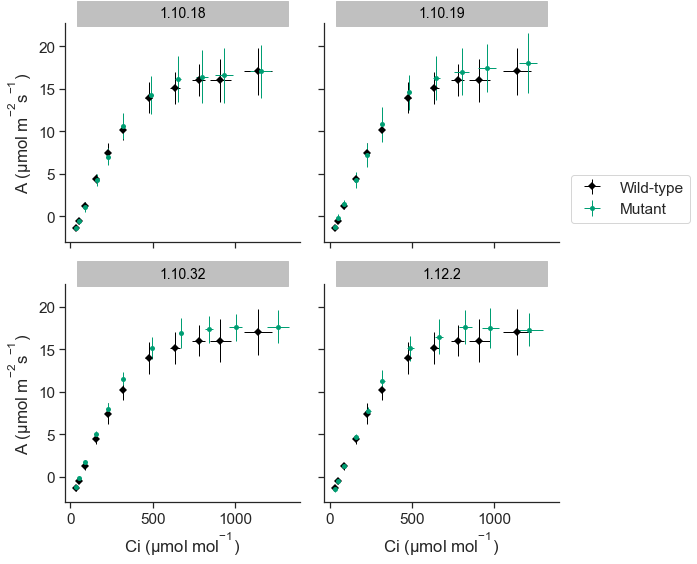

In [71]:
# sns.plotting_context()
sns.set(font_scale = 1.4, font="Arial")
sns.set_style(style='ticks')

# Choose hue colour palette
colours = ['#000000', '#009E73']

grid = sns.FacetGrid(grouped_df, col="plot", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], hue="type", hue_order=['wt', 'mutant'],
                     palette=colours, col_wrap=2, size=4, aspect=1, hue_kws=dict(marker=["D", "o"]))

grid.map(plt.errorbar, "Ci_mean", "A_mean", "A_std", "Ci_std", markersize=5, linewidth=1.2, linestyle='', elinewidth=1, capsize=1, 
        markeredgecolor='black', markeredgewidth=0)


# Adjust position abd labels of legend
legend_ax = grid.axes.flat[3]
handles, labels = legend_ax.get_legend_handles_labels()
leg = plt.legend(handles[0:2],['Wild-type', 'Mutant'], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)


# Set axis labels
grid.set_axis_labels(x_var="Ci ($\mu$mol mol$^{-1}$)", y_var="A ($\mu$mol m$^{-2}$s$^{-1}$)")


# Set titles 
grid.set_titles("{col_name}")
for ax in grid.axes:
    # set the title position to the horizontal center (0.5) of the axes
    title = ax.set_title(ax.get_title(), position=(.5, 1.0), backgroundcolor="silver", color='black', 
                         size=14)
    # set the box style of the title text box to our custom box
    bb = title.get_bbox_patch()
    # use the axes' width as width of the text box
    bb.set_boxstyle("ext", pad=0.4, width=ax.get_window_extent().width )

plt.savefig("../figures/aciCurves.pdf", transparent=True, dpi=300, bbox_inches='tight')

#### Plot stomatal conductance against Ci

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


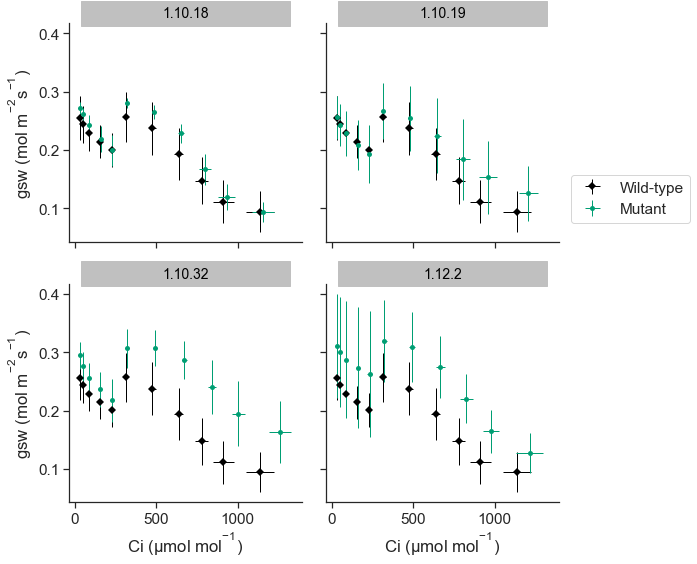

In [72]:
# sns.plotting_context()
sns.set(font_scale = 1.4, font="Arial")
sns.set_style(style='ticks')

# Choose hue colour palette
colours = ['#000000', '#009E73']

grid = sns.FacetGrid(grouped_df, col="plot", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], hue="type", hue_order=['wt', 'mutant'],
                     palette=colours, col_wrap=2, size=4, aspect=1, hue_kws=dict(marker=["D", "o"]))

grid.map(plt.errorbar, "Ci_mean", "gsw_mean", "gsw_std", "Ci_std", markersize=5, linewidth=1.2, linestyle='', elinewidth=1, capsize=1, 
        markeredgecolor='black', markeredgewidth=0)


# Adjust position abd labels of legend
legend_ax = grid.axes.flat[3]
handles, labels = legend_ax.get_legend_handles_labels()
leg = plt.legend(handles[0:2],['Wild-type', 'Mutant'], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)


# Set axis labels
grid.set_axis_labels(x_var="Ci ($\mu$mol mol$^{-1}$)", y_var="gsw (mol m$^{-2}$s$^{-1}$)")


# Set titles 
grid.set_titles("{col_name}")
for ax in grid.axes:
    # set the title position to the horizontal center (0.5) of the axes
    title = ax.set_title(ax.get_title(), position=(.5, 1.0), backgroundcolor="silver", color='black', 
                         size=14)
    # set the box style of the title text box to our custom box
    bb = title.get_bbox_patch()
    # use the axes' width as width of the text box
    bb.set_boxstyle("ext", pad=0.4, width=ax.get_window_extent().width )

plt.savefig("../figures/CigswCurves.pdf", transparent=True, dpi=300, bbox_inches='tight')

#### t-test to test the null hypothesis that there is no difference in maximum rate of carbon assimilation 

In [73]:
CO2_conc = 1500

for line in ['1.10.18', '1.10.19', '1.10.32', '1.12.2']:
    t_test = stats.ttest_ind(aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'wt')]['A'].to_list(),
                             aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'mutant')]['A'].to_list(), 
                             equal_var=True)
    
    print(line)
    print(t_test)

1.10.18
Ttest_indResult(statistic=-0.005984717456541609, pvalue=0.9953714623213051)
1.10.19
Ttest_indResult(statistic=-0.4982293733963182, pvalue=0.6317289692176347)
1.10.32
Ttest_indResult(statistic=-0.39844125203043756, pvalue=0.702178519466945)
1.12.2
Ttest_indResult(statistic=-0.18032895279915795, pvalue=0.8620038752472984)


In [74]:
CO2_conc = 1500

for line in ['1.10.18', '1.10.19', '1.10.32', '1.12.2']:
    t_test = stats.ttest_ind(aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'wt')]['Ci'].to_list(),
                             aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'mutant')]['Ci'].to_list(), 
                             equal_var=True)
    
    print(line)
    print(t_test)

1.10.18
Ttest_indResult(statistic=-0.3728441359020536, pvalue=0.7189492249348903)
1.10.19
Ttest_indResult(statistic=-1.5045174659964389, pvalue=0.17086132527084502)
1.10.32
Ttest_indResult(statistic=-2.3511907570959996, pvalue=0.05099804118091095)
1.12.2
Ttest_indResult(statistic=-1.3269605378240992, pvalue=0.22616768671318996)


#### t-test to test the null hypothesis that there is no difference in maximum stomatal conductance

In [75]:
CO2_conc = 1500

for line in ['1.10.18', '1.10.19', '1.10.32', '1.12.2']:
    t_test = stats.ttest_ind(aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'wt')]['gsw'].to_list(),
                             aci_df[(aci_df['plot'] == line) & (aci_df['CO2_r_sp'] == CO2_conc) & (aci_df['type'] == 'mutant')]['gsw'].to_list(), 
                             equal_var=True)
    
    print(line)
    print(t_test)

1.10.18
Ttest_indResult(statistic=0.024795972826539885, pvalue=0.9808250536796121)
1.10.19
Ttest_indResult(statistic=-1.1996643548556751, pvalue=0.264590386666656)
1.10.32
Ttest_indResult(statistic=-2.33841578921845, pvalue=0.051966014018142326)
1.12.2
Ttest_indResult(statistic=-1.4273897663825792, pvalue=0.19651797399744692)
